<center>
<h3>DiploDatos TP1 - Parte Gus</h3>
</center>



Nosotros centrarermos nuestro análisis en variables relacionadas a *Identity and Relationships* en paises de Latinoamérica, y los compararemos con las estadísticas globales. La pregunta a responder es simple: **¿Qué niveles de libertad se viven en Latinoamérica, especificamente en cuanto libertades de indentidad?**. Sin embargo, para hacer un análisis de los datos tenemos que platear también estas sub preguntas:

1. ¿Qué significa tener un puntaje de 4.5? Hay que poner los puntajes de la región en contexto con los datos del resto del mundo.
2. ¿Cuál es la tendencia a lo largo de los años? ¿Estamos mejorando, empeorando?
3. En este estudio, la libertad se mide con dos estimadores principales: *hf_score* que hace referencia a Human Freedom, y *ef_score* que hace referencia a Economic Freedom. Estos dos estimadores, ¿se relacionan de la misma manera con la libertad de identidad?

Inicialmente, en toda exploración de datos tenemos muy poca información a priori sobre el significado de los datos y tenemos que empezar por comprenderlos. Les proponemos los siguientes ejercicios como guía para comenzar esta exploración.

In [1]:
import matplotlib.pyplot as plt
import numpy
import pandas
import seaborn
from scipy import stats

In [2]:
seaborn.__version__

'0.9.0'

In [3]:
BLUE = '#35A7FF'
RED = '#FF5964'
GREEN = '#6BF178'
YELLOW = '#FFE74C'

In [4]:
dataset = pandas.read_csv('../datasets/hfi_cc_2018.csv')
dataset.shape

(1458, 123)

<h2>Pregunta 1</h2>

Para contestar esta pregunta primero observamos que el rango de Nivel de Libertad de Identidad cada país (*pf_identity*) va de 0 a 10; Por lo que en principio podemos encontrar que el valor 4.5 es un valor intermedio, esto que da como impresión inicial que es un país con problemas en este sentido. 
Podemos entonces comparar este valor con los valores ofrecidos por el dataset de otros países y/o continentes donde tenemos cierta certeza de los niveles de libertad de identidad que poseen, podemos tener estos conocimientos por experiencia propia del día a día y/o por estar informado sobre la historia, noticias y situación de los países mundiales.

Según este dataset el valor de Nivel de Libertad de Identidad (*pf_identity*) en Argentina es el valor máximo (10.0) esto puede resultar un poco discutible a simple vista para una persona local ya que sabemos que en Argentina todavía tenemos serios problemas con la aceptación social de personas con orientaciones sexuales hacia el mismo sexo, sin embargo, si analizamos los valores que componen este *pf_identity*, efectivamente vemos que analiza esta variable desde un punto de vista legal y tiene en cuenta la libertad real que una persona tiene para llevar a cabo diversos trámites como cambio de identidad, casamiento, divorcio, etc. Teniendo en cuenta ese aspecto estamos de acuerdo con el valor mostrado ya que, según nuestro modo de ver las cosas, refleja realmente lo que sucede en nuestro país en este momento en ese aspecto. 

Observamos que en Latinoamérica en general se mantiene esta tendencia de Argentina y aunque algunos países tengan un valor menor generalmente encontramos valores por encima de 7-8 en todos los países latinoamericanos, lo que es análogo a lo que conocemos en el día a día sobre nuestro continente. Lo mismo comprobamos a escala mundial, países de Oriente Medio como Irán, Pakistán (3.0 y 3.75 respectivamente) tienen valores muy bajos, sabemos que estos países tienen fuerte influencia de su religión que es muy cerrada y esto se refleja en estos números. Por otro lado tenemos países como los del continente europeo siendo el caso de Francia y Alemania (10.0 y 10.0 respectivamente), podemos observar como era esperable que estos países tengan valores máximos de libertad de identidad. Números mas variados se encuntran en el continente africano y asiático y esto es debido a la diversidad de culturas y contrastes que encontramos en estos continentes. Por ejemplo Sudáfrica (9.25) y Botsuana (4.25) a pesar de ser países que limitan entre sí.

Con este último valor (*Botsuana: 4.25*) encontramos un caso similar al que nos pide la consigna (cercano a 4.5). Mediante una rápida investigación supimos que este país reconoció por ley la identidad de género de una persona trans recién en 2017, un año después de hacerse esta encuesta, este país tampoco permite casamiento entre dos personas del mismo sexo. De este modo podemos hacernos una idea de que representa el valor pedido.

<h2>Pregunta 2</h2>

El siguiente gráfico muestra la evolución del valor *pf_identity* de Latinoamérica y el Caribe en 10 años (hasta 2016):

Text(0, 0.5, 'Valores')

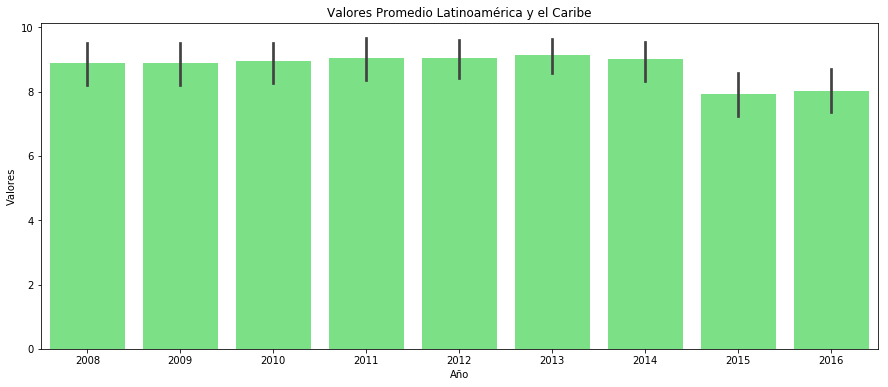

In [12]:
plt.figure(figsize=(15,6))
dataset_latino = dataset[dataset['region'] == 'Latin America & the Caribbean']
seaborn.barplot(data=dataset_latino, x='year', y='pf_identity', color=GREEN)
plt.title('Valores Promedio Latinoamérica y el Caribe')
plt.xlabel('Año')
plt.ylabel('Valores')

Podemos ver claramente que en los últimos dos años hubo un retroceso en este ítem y este retroceso tambièn se puede ver a nivel mundial en el siguiente gráfico:

Text(0, 0.5, 'Valores')

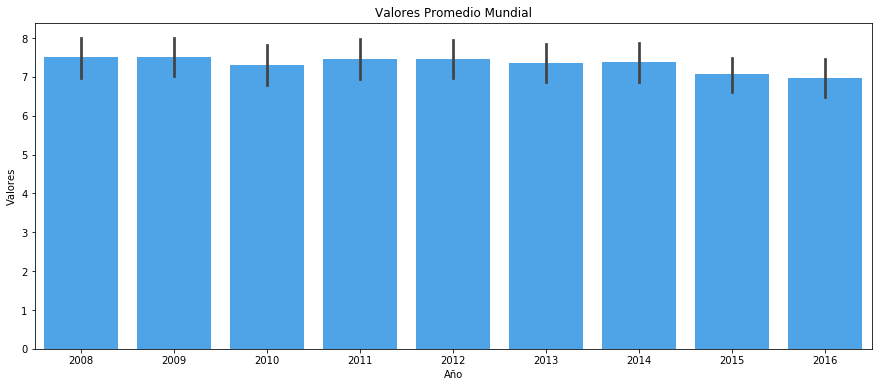

In [13]:
plt.figure(figsize=(15,6))
seaborn.barplot(data=dataset, x='year', y='pf_identity', color=BLUE)
plt.title('Valores Promedio Mundial')
plt.xlabel('Año')
plt.ylabel('Valores')

Mientras que en el caso de Argentina el valor se ha mantenido constante como máximo (10.0) a través de los años mostrados en el dataset.

<h2>Pregunta 3</h2>

Graficaremos los valores mundiales de *pf_identity* (azul), *hf_score* (naranja) y *hf_score* (verde).

Text(0, 0.5, 'Valores')

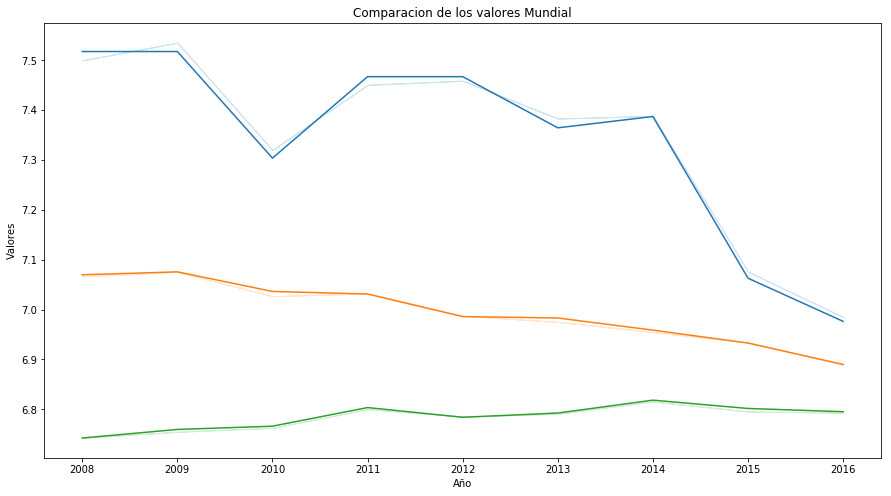

In [46]:
plt.figure(figsize=(15,8))
seaborn.lineplot(data = dataset, x='year', y='pf_identity',ci=0)
seaborn.lineplot(data = dataset, x='year', y='hf_score', ci=0)
seaborn.lineplot(data = dataset, x='year', y='ef_score', ci=0)
plt.title('Comparacion de los valores Mundial')
plt.xlabel('Año')
plt.ylabel('Valores')

Podemos ver que hay una tendencia en caída a nivel mundial de los valores *pf_identity* y *hf_score* lo que nos hace intuir que hay alguna dependencia entre ellos, sin embargo mirando este gráfico vemos que *ef_score*  no sigue la tendencia lo que nos da una primera impresión de que es independiente de las otras dos, sin embargo para sacarnos las duda ya que no estamos seguros de ello, analizaremos algunos continentes por separado para de este modo tratar de identificar algún patrón.

El siguiente gráfico es la comparación de los valores en Latinoamérica y el Caribe:

Text(0, 0.5, 'Valores')

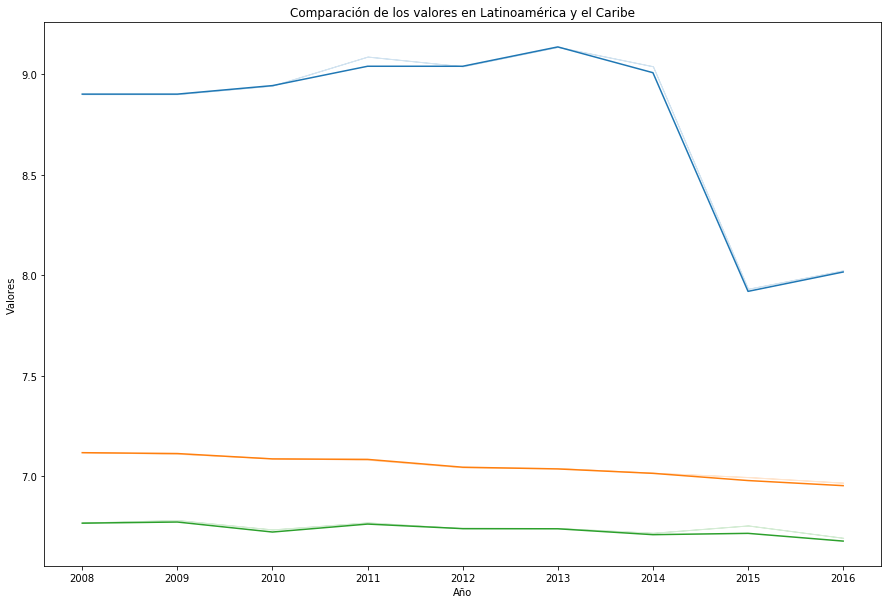

In [35]:
dataset_latino = dataset[dataset['region'] == 'Latin America & the Caribbean']
plt.figure(figsize=(15,8))
seaborn.lineplot(data = dataset_latino, x='year', y='pf_identity',ci=0)
seaborn.lineplot(data = dataset_latino, x='year', y='hf_score', ci=0)
seaborn.lineplot(data = dataset_latino, x='year', y='ef_score', ci=0)
plt.title('Comparación de los valores en Latinoamérica y el Caribe')
plt.xlabel('Año')
plt.ylabel('Valores')

En este caso si vemos una cierta tendencia general negativa. Claramente vemos que en este continente los factores económicos y humanos afectan negativamente en el índice de libertad de identidad.

Analicemos otro continente como Europa.

Text(0, 0.5, 'Valores')

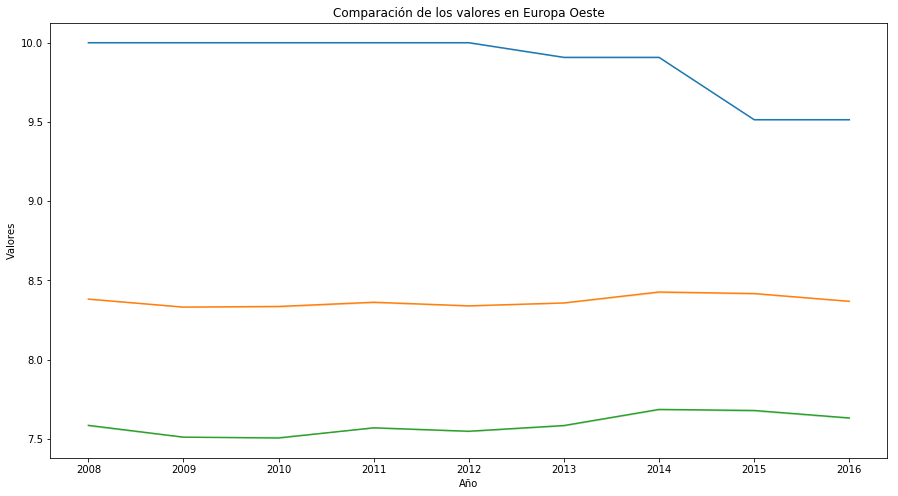

In [43]:
dataset_Europa = dataset[dataset['region'] == 'Western Europe']
plt.figure(figsize=(15,8))
seaborn.lineplot(data = dataset_Europa, x='year', y='pf_identity',ci=0)
seaborn.lineplot(data = dataset_Europa, x='year', y='hf_score', ci=0)
seaborn.lineplot(data = dataset_Europa, x='year', y='ef_score', ci=0)
plt.title('Comparación de los valores en Europa Oeste')
plt.xlabel('Año')
plt.ylabel('Valores')

En este caso es curioso ya que vemos que a pesar de que las condiciones sociales y económicas del continente se mantienen casi constantes hubo una gran pérdida en el índice libertad de identidad.

Por último analizaremos el Sur Asiático:

Text(0, 0.5, 'Valores')

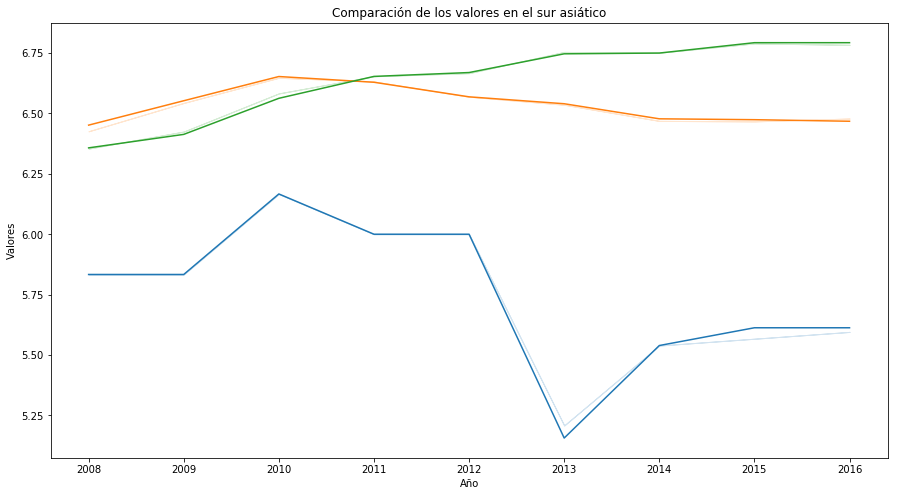

In [44]:
dataset_asia = dataset[dataset['region'] == 'South Asia']
plt.figure(figsize=(15,8))
seaborn.lineplot(data = dataset_asia, x='year', y='pf_identity',ci=0)
seaborn.lineplot(data = dataset_asia, x='year', y='hf_score', ci=0)
seaborn.lineplot(data = dataset_asia, x='year', y='ef_score', ci=0)
plt.title('Comparación de los valores en el sur asiático')
plt.xlabel('Año')
plt.ylabel('Valores')

Podemos ver en este caso que el factor económico no influye para nada en las variaciones del índice de libertad de identidad, en cambio, sí encontramos a simple vista una relación con el índice de libertad humana.

Podríamos seguir analizando muchos mas continentes sin embargo hay algo que está claro y es que en algunos sectores del mundo hay una dependencia entre algunos o todos estos factores, como el caso de Latinoamérica, y en otros no hay una dependencia (o por lo menos no es tan fuerte) como el caso de Europa. Por lo que creemos estar en condiciones de afirmar que aunque estos valores siempre estén relacionados entre sí, hay países donde esta dependencia es mas fuerte y otros donde es casi nula y en esos casos influyen mas fuertemente otros factores.